<h1>
Projekt AI - Predykcja wystąpienia wypadku samochodowego - Borys Stelmaszyk, Michał Pacuła
</h1>

<h3>Imports</h3>

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv('dataset_traffic_accident_prediction1.csv')

<h3>Cleaning data</h3>

In [33]:
df.head()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0


In [34]:
df.columns

Index(['Weather', 'Road_Type', 'Time_of_Day', 'Traffic_Density', 'Speed_Limit',
       'Number_of_Vehicles', 'Driver_Alcohol', 'Accident_Severity',
       'Road_Condition', 'Vehicle_Type', 'Driver_Age', 'Driver_Experience',
       'Road_Light_Condition', 'Accident'],
      dtype='object')

In [35]:
df.drop(['Driver_Experience', 'Vehicle_Type', 'Accident_Severity', 'Road_Light_Condition'], axis=1, inplace=True)

In [36]:
df.head()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Road_Condition,Driver_Age,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,Wet,51.0,0.0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Wet,49.0,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Icy,54.0,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Under Construction,34.0,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Dry,62.0,1.0


In [37]:
df.dtypes

Weather                object
Road_Type              object
Time_of_Day            object
Traffic_Density       float64
Speed_Limit           float64
Number_of_Vehicles    float64
Driver_Alcohol        float64
Road_Condition         object
Driver_Age            float64
Accident              float64
dtype: object

In [38]:
df.isna().sum()

Weather               42
Road_Type             42
Time_of_Day           42
Traffic_Density       42
Speed_Limit           42
Number_of_Vehicles    42
Driver_Alcohol        42
Road_Condition        42
Driver_Age            42
Accident              42
dtype: int64

In [39]:
print(len(df))

840


In [40]:
df.dropna(inplace=True)

In [41]:
df.isna().sum()

Weather               0
Road_Type             0
Time_of_Day           0
Traffic_Density       0
Speed_Limit           0
Number_of_Vehicles    0
Driver_Alcohol        0
Road_Condition        0
Driver_Age            0
Accident              0
dtype: int64

In [42]:
df = df.astype({'Traffic_Density' : 'int', 'Speed_Limit' : 'int', 'Number_of_Vehicles' : 'int', 'Driver_Alcohol' : 'int', 'Accident' : 'int', 'Driver_Age' : 'int'})

In [43]:
df.dtypes

Weather               object
Road_Type             object
Time_of_Day           object
Traffic_Density        int64
Speed_Limit            int64
Number_of_Vehicles     int64
Driver_Alcohol         int64
Road_Condition        object
Driver_Age             int64
Accident               int64
dtype: object

In [44]:
df.head()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Road_Condition,Driver_Age,Accident
0,Rainy,City Road,Morning,1,100,5,0,Wet,51,0
2,Rainy,Highway,Evening,1,60,4,0,Icy,54,0
3,Clear,City Road,Afternoon,2,60,3,0,Under Construction,34,0
4,Rainy,Highway,Morning,1,195,11,0,Dry,62,1
6,Foggy,Highway,Afternoon,0,60,4,0,Dry,27,1


In [45]:
categorical_columns = ['Weather', 'Road_Type', 'Time_of_Day', 'Road_Condition']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df

,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Driver_Age,Accident,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Stormy,Road_Type_Highway,Road_Type_Mountain Road,Road_Type_Rural Road,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Road_Condition_Icy,Road_Condition_Under Construction,Road_Condition_Wet
0,1,100,5,0,51,0,False,True,False,False,False,False,False,False,True,False,False,False,True
2,1,60,4,0,54,0,False,True,False,False,True,False,False,True,False,False,True,False,False
3,2,60,3,0,34,0,False,False,False,False,False,False,False,False,False,False,False,True,False
4,1,195,11,0,62,1,False,True,False,False,True,False,False,False,True,False,False,False,False
6,0,60,4,0,27,1,True,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,1,50,3,0,18,0,False,False,True,False,False,False,False,True,False,False,False,False,True
835,2,30,4,0,23,0,False,False,False,False,True,False,False,False,False,True,False,False,False
836,2,60,4,0,52,1,False,True,False,False,False,False,True,True,False,False,False,False,False
838,2,60,3,0,25,0,True,False,False,False,True,False,False,False,False,False,False,False,False


In [46]:
X = df.drop(columns=['Accident']) 
y = df['Accident']    

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<h3>Decision Tree Model</h3>

In [48]:
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters for DecisionTreeClassifier are:", grid_search.best_params_)


Best Parameters for DecisionTreeClassifier are: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


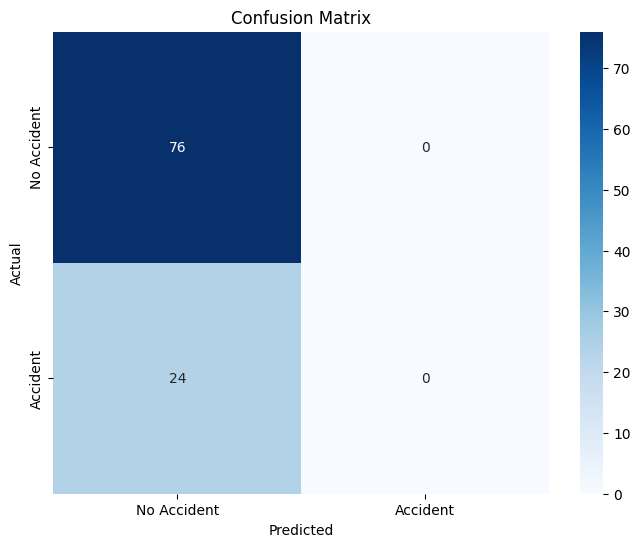

In [49]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=1, min_samples_split=2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

class_names = ['No Accident', 'Accident']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()


<h3>Random Forest Model</h3>

In [50]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


Accuracy: 0.77
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.99      0.87        76
           1       0.67      0.08      0.15        24

    accuracy                           0.77       100
   macro avg       0.72      0.54      0.51       100
weighted avg       0.75      0.77      0.69       100



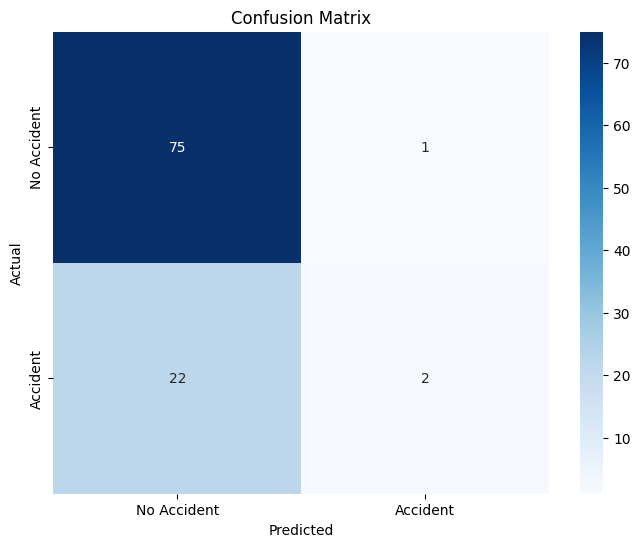

In [51]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_leaf=2, min_samples_split=5)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Accident', 'Accident'], yticklabels=['No Accident', 'Accident'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<h3>Logisitic Regression Model</h3>

In [52]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}


Accuracy: 0.76
Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.86        76
           1       0.00      0.00      0.00        24

    accuracy                           0.76       100
   macro avg       0.38      0.50      0.43       100
weighted avg       0.58      0.76      0.66       100



c:\Users\micha\Documents\Studia\AI_Projekt\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\micha\Documents\Studia\AI_Projekt\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\micha\Documents\Studia\AI_Projekt\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

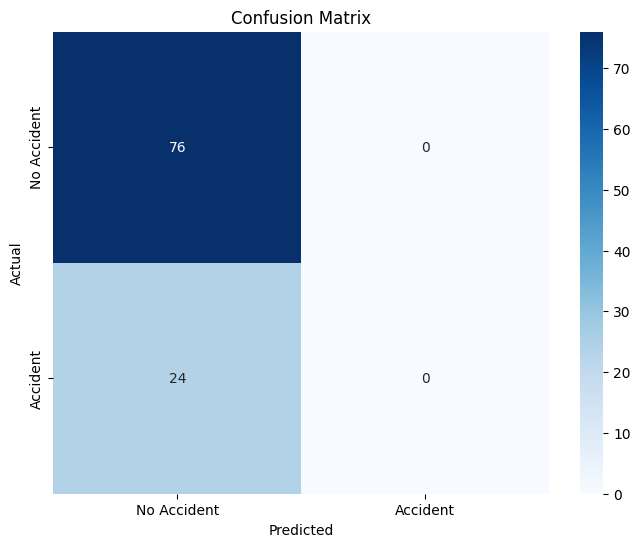

In [53]:
log_reg = LogisticRegression(max_iter=1000, C=0.01, penalty='l1', solver='liblinear', random_state=42)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Accident', 'Accident'], yticklabels=['No Accident', 'Accident'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<h3>Simple Neural Network</h3>

In [54]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Epoch 1/50


c:\Users\micha\Documents\Studia\AI_Projekt\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3945 - loss: 0.7974 - val_accuracy: 0.4875 - val_loss: 0.7414
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5287 - loss: 0.7045 - val_accuracy: 0.5625 - val_loss: 0.7007
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6526 - loss: 0.6444 - val_accuracy: 0.5875 - val_loss: 0.6752
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7047 - loss: 0.6084 - val_accuracy: 0.6250 - val_loss: 0.6613
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6990 - loss: 0.6038 - val_accuracy: 0.6000 - val_loss: 0.6549
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7155 - loss: 0.6008 - val_accuracy: 0.6125 - val_loss: 0.6528
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7311 - loss: 0.5658 - val_accuracy: 0.6000 - val_loss: 0.6522
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7005 - loss: 0.5901 - val_accuracy: 0.6000 - val_loss: 0.6529
Ep

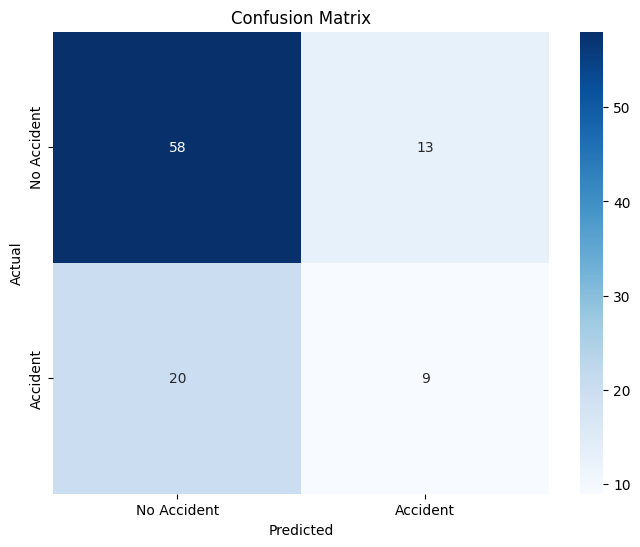

In [55]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", test_accuracy)

y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Accident', 'Accident'], yticklabels=['No Accident', 'Accident'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()